<a href="https://colab.research.google.com/github/marcelogarret/reconpad/blob/main/aula5a_gridsearch_garret_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Replicando solução feita na aula

In [1]:
## Importando o dataset
from sklearn.datasets import fetch_california_housing
X, y = fetch_california_housing(return_X_y=True)
X.shape, y.shape

((20640, 8), (20640,))

In [2]:
## Importando bibliotecas de seleção de modelos, métricas, pré-processamento e pipeline
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import cross_validate, RepeatedKFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import numpy as np

## Configuração 1 do Pipeline ##

## Definindo parãmetros de ajuste
param1 = {'n_neighbors': [1, 7, 15],
          'metric': ['cosine', 'cityblock', 'euclidean']}

## Definindo modelo de GridSearach
GSModel = GridSearchCV(KNeighborsRegressor(), param1, verbose=0, cv=5,
                      scoring=make_scorer(mean_squared_error,
                                          greater_is_better=False,
                                          squared=False))

## Construindo o Pipeline com o pré-processamento e o modelo de GridSearchKNN
modeloAninhado1 = Pipeline([
    ('pre', StandardScaler()),
    ('clf', GSModel)
])

## Realizando a validação cruzada com 5 folds e retornando o resultado do treinamento
scores1 = cross_validate(modeloAninhado1, X, y, cv=5, return_estimator=True,
                        scoring=make_scorer(mean_squared_error, squared=False), return_train_score=True)

## Comparando o resultado médio dos treinamentos e dos testes da validação cruzada
print(f"RMSE = {np.mean(scores1['test_score'])}")

RMSE = 0.7449313603008859


In [3]:
## Configuração 2 do Pipeline ##
## Construindo o Pipeline com o pré-processamento e o modelo de regressão Knn
pipe = Pipeline([
    ('pre', StandardScaler()),
    ('clf', KNeighborsRegressor())
])

## Definindo parãmetros de ajuste
param2 = {'pre__with_mean': [True, False],
         'clf__n_neighbors': [1, 7, 15],
         'clf__metric': ['cosine', 'cityblock', 'euclidean']}

## Definindo modelo aninhado com Pipeline interno ao GridSearchcV
modeloAninhado2 = GridSearchCV(pipe, param2, verbose=0, cv=5,
                      scoring=make_scorer(mean_squared_error,
                                          greater_is_better=False,
                                          squared=False))

## Realizando a validação cruzada com 5 folds e retornando o resultado do treinamento
scores2 = cross_validate(modeloAninhado2, X, y, cv=5, return_estimator=True,
                        scoring=make_scorer(mean_squared_error, squared=False))

## Comparando o resultado médio dos treinamentos e dos testes da validação cruzada
print(f"RMSE = {np.mean(scores2['test_score'])}")

RMSE = 0.7449313603008859


**Podemos observar que resultado divergiu do obtido em sala de aula, uma vez que em ambos os métodos o resultado de RMSE foram similares. Após voltar para o arquivo original compartilhado na tarefa, pude notar que em um dos casos foi usado o cross_validate com o dataset inteiro (X, y), enquanto que no outro caso foi usado o cross_validate com o split de treinamento do dataset original (Xtr, ytr), o prejudica a comparação direta dos resultados.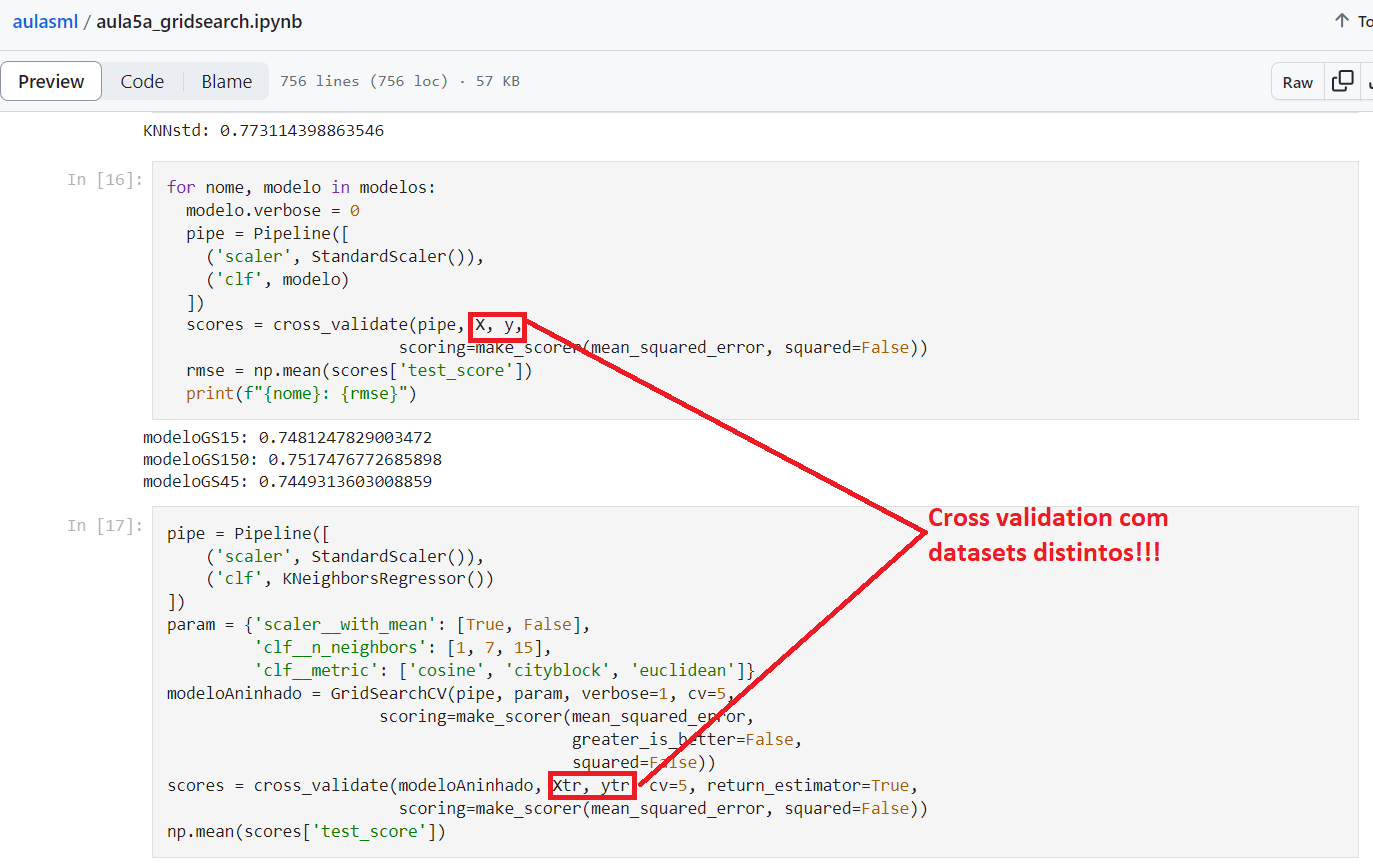**

# Solução alternativa 1

In [4]:
## Importando o dataset
from seaborn import load_dataset
import pandas as pd
df = load_dataset('penguins')
df = df.dropna()

In [5]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [6]:
X, y = df[df.columns[0:(len(df.columns)-1)]].to_numpy(), df[df.columns[(len(df.columns)-1)]].replace({'Male':1, 'Female':0}).to_numpy()
X.shape, y.shape

((333, 6), (333,))

In [7]:
## Importando bibliotecas de seleção de modelos, métricas, pré-processamento e pipeline
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import cross_validate, RepeatedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
import numpy as np

## Configuração 1 do Pipeline ##

## Definindo parãmetros de ajuste
param1 = {'n_neighbors': [1, 3, 5]}

## Definindo modelo de GridSearach com KNN
GridSearchKNN = GridSearchCV(KNeighborsClassifier(), param1, verbose=0, cv=5,
                      scoring=make_scorer(mean_squared_error,
                                          greater_is_better=False,
                                          squared=False))

## Construindo o Pipeline com o pré-processamento e o modelo de GridSearchKNN
modeloAninhado1 = Pipeline([
    ('pre', OneHotEncoder(handle_unknown='ignore')),
    ('clf', GridSearchKNN)
])

## Realizando a validação cruzada com 5 folds e retornando o resultado do treinamento
scores1 = cross_validate(modeloAninhado1, X, y, cv=5, return_estimator=True,
                        scoring=make_scorer(mean_squared_error, squared=False), return_train_score=True)

## Comparando o resultado médio dos treinamentos e dos testes da validação cruzada
print(f"RMSE = {np.mean(scores1['test_score'])}")

RMSE = 0.5617532198709724


In [8]:
## Configuração 2 do Pipeline ##
## Construindo o Pipeline com o pré-processamento e o modelo de regressão Knn
pipe = Pipeline([
    ('pre', OneHotEncoder(handle_unknown='ignore')),
    ('clf', KNeighborsClassifier())
])

## Definindo parãmetros de ajuste
param2 = {'pre__sparse_output': [True, False],
         'pre__min_frequency': [1, 5, 10],
         'clf__n_neighbors': [1, 3, 5]}

## Definindo modelo aninhado com Pipeline interno ao GridSearchcV
modeloAninhado2 = GridSearchCV(pipe, param2, verbose=0, cv=5,
                      scoring=make_scorer(mean_squared_error,
                                          greater_is_better=False,
                                          squared=False))

## Realizando a validação cruzada com 5 folds e retornando o resultado do treinamento
scores2 = cross_validate(modeloAninhado2, X, y, cv=5, return_estimator=True,
                        scoring=make_scorer(mean_squared_error, squared=False))

## Comparando o resultado médio dos treinamentos e dos testes da validação cruzada
print(f"RMSE = {np.mean(scores2['test_score'])}")

RMSE = 0.5617532198709724


# Solução Alternativa 2

In [9]:
## Importando o dataset
from sklearn.datasets import load_wine
X, y = load_wine(return_X_y=True)
X.shape, y.shape

((178, 13), (178,))

In [10]:
## Importando bibliotecas de seleção de modelos, métricas, pré-processamento e pipeline
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import cross_validate, RepeatedKFold
from sklearn.linear_model import Perceptron
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import numpy as np

## Configuração 1 do Pipeline ##

## Definindo parãmetros de ajuste
param1 = {'alpha': [0.0001, 0.001, 0.01]}

## Definindo modelo de GridSearach com KNN
GridSearchKNN = GridSearchCV(Perceptron(), param1, verbose=0, cv=5,
                      scoring=make_scorer(mean_squared_error,
                                          greater_is_better=False,
                                          squared=False))

## Construindo o Pipeline com o pré-processamento e o modelo de GridSearchKNN
modeloAninhado1 = Pipeline([
    # ('pre', StandardScaler()),
    ('clf', GridSearchKNN)
])

## Realizando a validação cruzada com 5 folds e retornando o resultado do treinamento
scores1 = cross_validate(modeloAninhado1, X, y, cv=5, return_estimator=True,
                        scoring=make_scorer(mean_squared_error, squared=False), return_train_score=True)

## Comparando o resultado médio dos treinamentos e dos testes da validação cruzada
print(f"RMSE = {np.mean(scores1['test_score'])}")

RMSE = 0.9105529643583333


In [11]:
## Configuração 2 do Pipeline ##
## Construindo o Pipeline com o pré-processamento e o modelo de regressão Knn
pipe = Pipeline([
    ('pre', StandardScaler()),
    ('clf', Perceptron())
])

## Definindo parãmetros de ajuste
param2 = {'pre__with_mean': [True, False],
          'clf__alpha': [0.0001, 0.001, 0.01]}

## Definindo modelo aninhado com Pipeline interno ao GridSearchcV
modeloAninhado2 = GridSearchCV(pipe, param2, verbose=0, cv=5,
                      scoring=make_scorer(mean_squared_error,
                                          greater_is_better=False,
                                          squared=False))

## Realizando a validação cruzada com 5 folds e retornando o resultado do treinamento
scores2 = cross_validate(modeloAninhado2, X, y, cv=5, return_estimator=True,
                        scoring=make_scorer(mean_squared_error, squared=False))

## Comparando o resultado médio dos treinamentos e dos testes da validação cruzada
print(f"RMSE = {np.mean(scores2['test_score'])}")

RMSE = 0.12828292978581227
